In [1]:
import pandas as pd
import numpy as np 
import csv


with open('pca_a.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)

In [2]:
data = pd.read_csv("test.csv",header=None)

print(data.shape)

(150, 5)


In [3]:
pcaa = np.zeros((data.shape[0],data.shape[1]-1))
for i in range(len(data)):
    for j in range(len(data.iloc[i])-1):
            pcaa[i][j] = data.iloc[i][j]
print(pcaa) 

cols_a=[]
for i in range(len(data)):
    for j in range(len(data.iloc[i])-1,len(data.iloc[i])):
        cols_a.append(data.iloc[i][j])
        
print(cols_a)       

[[2.6 5.4 1.9 6.4]
 [3.3 6.  2.2 6.7]
 [3.8 2.  0.8 5.4]
 [3.2 6.5 2.3 7.8]
 [3.6 1.7 0.6 4.8]
 [3.4 5.6 2.7 7.1]
 [3.8 1.9 0.6 5.5]
 [3.6 6.4 2.2 7.6]
 [2.6 4.9 1.9 6.6]
 [3.4 5.5 2.2 6.3]
 [3.1 5.5 2.  6.4]
 [3.2 5.  1.9 6.9]
 [3.4 4.5 1.7 6. ]
 [4.  1.8 0.6 5.4]
 [3.6 6.1 2.7 7.3]
 [3.9 2.  1.  5.4]
 [3.2 4.9 1.7 6.1]
 [3.3 4.9 1.9 6.4]
 [3.4 5.2 2.2 6.4]
 [3.8 1.9 0.6 5.4]
 [3.5 5.9 2.2 6.8]
 [3.5 2.  0.6 5.2]
 [3.8 2.3 0.6 5.2]
 [2.7 4.8 1.7 6.7]
 [3.5 5.1 1.9 7.1]
 [3.4 4.6 1.9 6.3]
 [3.4 4.9 1.9 5.8]
 [3.2 7.1 2.4 8.1]
 [3.4 1.7 0.6 4.8]
 [3.4 1.8 0.5 5.2]
 [3.4 4.9 1.9 6. ]
 [3.4 6.2 2.6 6.9]
 [3.9 1.9 0.6 5.6]
 [4.  1.4 0.6 5. ]
 [3.4 5.3 2.2 6.5]
 [3.5 1.9 0.6 5. ]
 [3.4 1.8 0.7 5.2]
 [2.9 5.4 2.3 6.7]
 [3.2 5.2 1.8 7.2]
 [2.9 4.9 2.1 5.3]
 [3.3 5.1 1.8 6.5]
 [4.8 1.9 0.8 6.1]
 [3.8 6.  2.8 6.7]
 [3.4 5.4 2.1 7.1]
 [2.4 3.9 1.4 5.4]
 [3.8 4.9 2.  6.4]
 [3.6 5.7 2.7 6.8]
 [3.8 1.8 0.7 5. ]
 [2.7 1.7 0.7 4.9]
 [3.8 1.8 0.6 5.6]
 [3.9 1.8 0.6 5.5]
 [3.1 4.5 1.4 6.2]
 [2.9 4.4 1.

In [4]:
mean_vec = np.mean(pcaa, axis=0)
print(mean_vec)
cov_mat = (pcaa - mean_vec).T.dot((pcaa - mean_vec)) / (pcaa.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

[3.454      4.15866667 1.59866667 6.24333333]
Covariance matrix 
[[ 0.18800403 -0.32171275 -0.11798121 -0.03926846]
 [-0.32171275  3.11317942  1.29638747  1.27368233]
 [-0.11798121  1.29638747  0.58241432  0.5169038 ]
 [-0.03926846  1.27368233  0.5169038   0.68569351]]


In [5]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.08226889 -0.72971237 -0.59641809  0.32409435]
 [-0.85657211  0.1757674  -0.07252408  0.47971899]
 [-0.35884393  0.07470647 -0.54906091 -0.75112056]
 [-0.36158968 -0.65653988  0.58099728 -0.31725455]]

Eigenvalues 
[4.22484077 0.24224357 0.07852391 0.02368303]


In [6]:
eigval_pairs = [(np.abs(eig_vals[i]), i) for i in range(len(eig_vals))]

eigval_pairs.sort()
eigval_pairs.reverse()
print(eigval_pairs)


matrix_w = np.hstack((eig_vecs[:,eigval_pairs[0][1]].reshape(pcaa.shape[1],1), 
                      eig_vecs[:,eigval_pairs[1][1]].reshape(pcaa.shape[1],1)))



[(4.224840768320114, 0), (0.2422435716275154, 1), (0.07852390809415469, 2), (0.02368302712600217, 3)]


In [7]:
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.08226889 -0.72971237]
 [-0.85657211  0.1757674 ]
 [-0.35884393  0.07470647]
 [-0.36158968 -0.65653988]]


In [8]:
Y = pcaa.dot(matrix_w)
print(Y)

[[-7.40756765 -5.00802115]
 [-8.08005277 -5.58790939]
 [-3.64018183 -5.9069224 ]
 [-8.95019875 -6.14177767]
 [-3.11094138 -5.43472751]
 [-8.05325487 -5.95645031]
 [-3.5189148  -6.00509442]
 [-8.72343166 -6.32740203]
 [-7.05159953 -5.22721283]
 [-7.49890396 -5.48614837]
 [-7.48797481 -5.34782995]
 [-7.19637231 -5.84442547]
 [-6.35443299 -5.50230705]
 [-3.38064484 -6.10295965]
 [-8.53740508 -6.14581705]
 [-3.70372372 -5.96495234]
 [-6.74967457 -5.3517116 ]
 [-6.92169337 -5.60670351]
 [-7.27809129 -5.60453258]
 [-3.48275583 -5.93944043]
 [-8.01410075 -5.81708259]
 [-3.52077577 -5.571642  ]
 [-3.75306674 -5.73782549]
 [-6.92210562 -5.39835608]
 [-7.32966679 -6.17707042]
 [-6.62033589 -5.66675098]
 [-6.69651268 -5.28575082]
 [-9.60850331 -6.22580855]
 [-3.12739516 -5.28878503]
 [-3.32180385 -5.54129489]
 [-6.76883061 -5.41705879]
 [-8.45899581 -5.72715253]
 [-3.54684688 -6.14371965]
 [-2.89338013 -5.91065065]
 [-7.39990747 -5.65260983]
 [-3.36280063 -5.45791077]
 [-3.39357263 -5.5263536 ]
 

In [9]:
import matplotlib
import matplotlib.pyplot as plt


# color_dict = { 'Asthma':'red', 'Arrhythmia':'blue', 'Hypertension':'black' }
x = Y[:,0]
y = Y[:,1]
classes = np.unique(cols_a)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cols_a[j] == u]
    yi = [y[j] for j  in range(len(x)) if cols_a[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('PCA_A Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')
# plt.scatter( x, y, color=[ color_dict[i] for i in cols_a ] )
# plt.show()
# fig = plt.figure()
plt.savefig('pcaa.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


## PCA_B

(386, 17)
[[-0.22  0.37  0.92 ...  1.62  1.    0.08]
 [ 1.3   0.4  -0.05 ...  0.32 -0.46  1.63]
 [ 1.11  1.25  0.85 ...  0.16  0.01  1.12]
 ...
 [ 0.66  0.26  0.16 ...  0.79  0.05  0.39]
 [ 0.23  0.69  0.75 ... -1.02  0.93  0.38]
 [ 0.4   0.38  0.43 ...  0.38 -0.54  1.08]]
['Septic', 'HVD', 'HVD', 'Septic', 'TB', 'CD', 'TB', 'CD', 'Septic', 'Septic', 'TB', 'Septic', 'Septic', 'HVD', 'CD', 'HVD', 'CD', 'Septic', 'CD', 'TB', 'HVD', 'CD', 'HVD', 'HVD', 'CA', 'Septic', 'Septic', 'CD', 'CA', 'CA', 'Septic', 'TB', 'Septic', 'Septic', 'CA', 'TB', 'HVD', 'TB', 'Septic', 'TB', 'CD', 'CA', 'TB', 'Septic', 'HVD', 'Septic', 'TB', 'TB', 'CA', 'CA', 'Septic', 'CA', 'CA', 'CD', 'CA', 'Septic', 'CD', 'TB', 'CD', 'HVD', 'Septic', 'Septic', 'CD', 'TB', 'Septic', 'HVD', 'CA', 'Septic', 'HVD', 'CA', 'HVD', 'CD', 'TB', 'CD', 'CD', 'Septic', 'CD', 'HVD', 'CA', 'TB', 'Septic', 'TB', 'TB', 'TB', 'Septic', 'CA', 'Septic', 'HVD', 'Septic', 'CD', 'Septic', 'CD', 'CA', 'TB', 'TB', 'Septic', 'Septic', 'Septic', 'S

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Eigenvectors 
[[-0.22059682  0.23010655 -0.07985271  0.09599798 -0.38287915  0.27722704
   0.36111336 -0.00393086 -0.26924379  0.2466878   0.06773479 -0.06709837
  -0.06664577 -0.20971609 -0.53167224  0.2353534 ]
 [-0.09936609 -0.39525729 -0.04701264  0.13874368  0.10805102 -0.26825411
   0.13729517  0.03332116 -0.17158185  0.61215269 -0.05872452 -0.44085192
   0.2512423   0.11801186  0.04479641 -0.16678148]
 [ 0.0782977  -0.03889845 -0.26887639  0.20622076  0.14097381  0.03754943
  -0.46896463 -0.33429895 -0.13507479  0.15992263 -0.44421627  0.30833191
   0.07481162  0.19570049 -0.36918316  0.09032664]
 [-0.03838854 -0.10539061 -0.21400013  0.16304736 -0.26071716 -0.1998347
  -0.33627051  0.09814027 -0.30395718 -0.04577179  0.19892827  0.11321662
   0.30361566 -0.44441656  0.3316689   0.37128647]
 [ 0.07920924  0.29029468  0.51818033  0.55251207  0.26179343  0.21223163
  -0.17315687  0.34171961 -0.24592526  0.05739762 -0.04181923 -0.04078279
   0.01887209 -0.03431173  0.05068653 -0.06

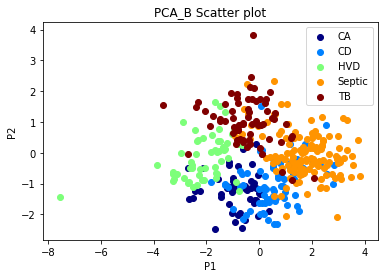

In [10]:
with open('pca_b.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)
    
data = pd.read_csv("test.csv",header=None)

print(data.shape)    

pcab = np.zeros((data.shape[0],data.shape[1]-1))
for i in range(len(data)):
    for j in range(len(data.iloc[i])-1):
            pcab[i][j] = data.iloc[i][j]
print(pcab) 

cols_b=[]
for i in range(len(data)):
    for j in range(len(data.iloc[i])-1,len(data.iloc[i])):
        cols_b.append(data.iloc[i][j])
        
print(cols_b)   


mean_vec = np.mean(pcab, axis=0)
print(mean_vec)
cov_mat = (pcab - mean_vec).T.dot((pcab - mean_vec)) / (pcab.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


eigval_pairs = [(np.abs(eig_vals[i]), i) for i in range(len(eig_vals))]

eigval_pairs.sort()
eigval_pairs.reverse()
print(eigval_pairs)


matrix_w = np.hstack((eig_vecs[:,eigval_pairs[0][1]].reshape(pcab.shape[1],1), 
                      eig_vecs[:,eigval_pairs[1][1]].reshape(pcab.shape[1],1)))

print('Matrix W:\n', matrix_w)


Y = pcab.dot(matrix_w)
print(Y)


# color_dict = { 'Asthma':'red', 'Arrhythmia':'blue', 'Hypertension':'black' }
x = Y[:,0]
y = Y[:,1]
classes = np.unique(cols_b)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cols_b[j] == u]
    yi = [y[j] for j  in range(len(x)) if cols_b[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('PCA_B Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')
# plt.scatter( x, y, color=[ color_dict[i] for i in cols_a ] )
# plt.show()
# fig = plt.figure()
plt.savefig('pcab.png')

## PCA_C

(428, 12)
[[0.88 1.16 1.47 ... 1.27 1.51 1.12]
 [1.19 0.71 0.92 ... 1.42 1.16 1.24]
 [1.11 0.73 1.1  ... 1.12 1.18 0.89]
 ...
 [0.92 0.85 0.91 ... 1.16 0.73 1.2 ]
 [3.5  3.21 1.51 ... 1.19 1.51 2.11]
 [0.79 0.8  1.1  ... 1.17 0.99 1.1 ]]
['Obesity', 'Diabetes', 'Obesity', 'ALL', 'COPD', 'Diabetes', 'Obesity', 'Diabetes', 'Diabetes', 'Diabetes', 'AML', 'ALL', 'Obesity', 'ALL', 'Obesity', 'Obesity', 'ALL', 'Diabetes', 'COPD', 'Diabetes', 'Obesity', 'Diabetes', 'AML', 'Breast Cancer', 'Diabetes', 'Diabetes', 'Diabetes', 'Diabetes', 'Breast Cancer', 'Breast Cancer', 'Obesity', 'Obesity', 'Diabetes', 'Colen Cancer', 'Obesity', 'Obesity', 'Diabetes', 'ALL', 'Diabetes', 'AML', 'ALL', 'ALL', 'Obesity', 'AML', 'AML', 'Obesity', 'AML', 'Diabetes', 'Obesity', 'Obesity', 'Breast Cancer', 'Diabetes', 'COPD', 'ALL', 'COPD', 'Colen Cancer', 'Obesity', 'COPD', 'Colen Cancer', 'Obesity', 'COPD', 'AML', 'AML', 'ALL', 'Obesity', 'Colen Cancer', 'COPD', 'Obesity', 'AML', 'Diabetes', 'Obesity', 'ALL', 'AML

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

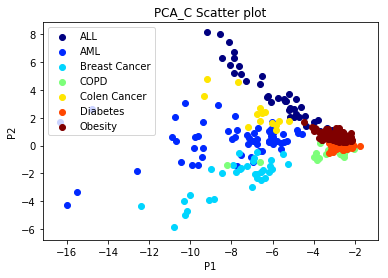

In [11]:
with open('pca_c.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)
    
data = pd.read_csv("test.csv",header=None)

print(data.shape)    

pcac = np.zeros((data.shape[0],data.shape[1]-1))
for i in range(len(data)):
    for j in range(len(data.iloc[i])-1):
            pcac[i][j] = data.iloc[i][j]
print(pcac) 

cols_c=[]
for i in range(len(data)):
    for j in range(len(data.iloc[i])-1,len(data.iloc[i])):
        cols_c.append(data.iloc[i][j])
        
print(cols_c)   


mean_vec = np.mean(pcac, axis=0)
print(mean_vec)
cov_mat = (pcac - mean_vec).T.dot((pcac - mean_vec)) / (pcac.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


eigval_pairs = [(np.abs(eig_vals[i]), i) for i in range(len(eig_vals))]

eigval_pairs.sort()
eigval_pairs.reverse()
print(eigval_pairs)


matrix_w = np.hstack((eig_vecs[:,eigval_pairs[0][1]].reshape(pcac.shape[1],1), 
                      eig_vecs[:,eigval_pairs[1][1]].reshape(pcac.shape[1],1)))

print('Matrix W:\n', matrix_w)


Y = pcac.dot(matrix_w)
print(Y)


# color_dict = { 'Asthma':'red', 'Arrhythmia':'blue', 'Hypertension':'black' }
x = Y[:,0]
y = Y[:,1]
classes = np.unique(cols_c)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cols_c[j] == u]
    yi = [y[j] for j  in range(len(x)) if cols_c[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('PCA_C Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')
# plt.scatter( x, y, color=[ color_dict[i] for i in cols_a ] )
# plt.show()
# fig = plt.figure()
plt.savefig('pcac.png')

## SVD

In [12]:
#PCA_A
# from numpy import diag
# from numpy import zeros
# from scipy.linalg import svd

# U, s, VT = svd(pcac)

# print(U.shape)
# print(s)
# print(VT.shape)


# Sigma = np.zeros((pcac.shape[0], pcac.shape[1]))
# for i in range(min(pcac.shape[0], pcac.shape[1])):
#     Sigma[i, i] = s[i]
    
# print(Sigma.shape)
# n_elements = 2
# Sigma = Sigma[:, :n_elements]

# VT = VT[:n_elements, :]
# # reconstruct
# B = U.dot(Sigma.dot(VT))
# print(B)
# # transform
# T = U.dot(Sigma)
# print(T)
# T = pcac.dot(VT.T)
# print(T)

# # color_dict = { 'Asthma':'red', 'Arrhythmia':'blue', 'Hypertension':'black' }
# x = T[:,0]
# y = T[:,1]
# classes = np.unique(cols_c)
# colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
# for i, u in enumerate(classes):
#     xi = [x[j] for j  in range(len(x)) if cols_c[j] == u]
#     yi = [y[j] for j  in range(len(x)) if cols_c[j] == u]
#     plt.scatter(xi, yi, c=colors[i], label=str(u))
# plt.legend()
# plt.title('SCIPY SVD PCA_C Scatter plot')
# plt.xlabel('P1')
# plt.ylabel('P2')
# # plt.scatter( x, y, color=[ color_dict[i] for i in cols_a ] )
# # plt.show()
# # fig = plt.figure()
# plt.savefig('scipysvd_pcac.png')

In [13]:
#PCA_B
# from numpy import diag
# from numpy import zeros
# from scipy.linalg import svd

# U, s, VT = svd(pcab)

# print(U.shape)
# print(s)
# print(VT.shape)


# Sigma = np.zeros((pcab.shape[0], pcab.shape[1]))
# for i in range(min(pcab.shape[0], pcab.shape[1])):
#     Sigma[i, i] = s[i]
    
# print(Sigma.shape)
# n_elements = 2
# Sigma = Sigma[:, :n_elements]

# VT = VT[:n_elements, :]
# # reconstruct
# B = U.dot(Sigma.dot(VT))
# print(B)
# # transform
# T = U.dot(Sigma)
# print(T)
# T = pcab.dot(VT.T)
# print(T)

# # color_dict = { 'Asthma':'red', 'Arrhythmia':'blue', 'Hypertension':'black' }
# x = T[:,0]
# y = T[:,1]
# classes = np.unique(cols_b)
# colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
# for i, u in enumerate(classes):
#     xi = [x[j] for j  in range(len(x)) if cols_b[j] == u]
#     yi = [y[j] for j  in range(len(x)) if cols_b[j] == u]
#     plt.scatter(xi, yi, c=colors[i], label=str(u))
# plt.legend()
# plt.title('SCIPY SVD PCA_B Scatter plot')
# plt.xlabel('P1')
# plt.ylabel('P2')
# # plt.scatter( x, y, color=[ color_dict[i] for i in cols_a ] )
# # plt.show()
# # fig = plt.figure()
# plt.savefig('scipysvd_pcab.png')

In [14]:
#PCA_C
# from numpy import diag
# from numpy import zeros
# from scipy.linalg import svd

# U, s, VT = svd(pcaa)

# print(U.shape)
# print(s)
# print(VT.shape)


# Sigma = np.zeros((pcaa.shape[0], pcaa.shape[1]))
# for i in range(min(pcaa.shape[0], pcaa.shape[1])):
#     Sigma[i, i] = s[i]
    
# print(Sigma.shape)
# n_elements = 2
# Sigma = Sigma[:, :n_elements]

# VT = VT[:n_elements, :]
# # reconstruct
# B = U.dot(Sigma.dot(VT))
# print(B)
# # transform
# T = U.dot(Sigma)
# print(T)
# T = pcaa.dot(VT.T)
# print(T)

# # color_dict = { 'Asthma':'red', 'Arrhythmia':'blue', 'Hypertension':'black' }
# x = T[:,0]
# y = T[:,1]
# classes = np.unique(cols_a)
# colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
# for i, u in enumerate(classes):
#     xi = [x[j] for j  in range(len(x)) if cols_a[j] == u]
#     yi = [y[j] for j  in range(len(x)) if cols_a[j] == u]
#     plt.scatter(xi, yi, c=colors[i], label=str(u))
# plt.legend()
# plt.title('SCIPY SVD PCA_A Scatter plot')
# plt.xlabel('P1')
# plt.ylabel('P2')
# # plt.scatter( x, y, color=[ color_dict[i] for i in cols_a ] )
# # plt.show()
# # fig = plt.figure()
# plt.savefig('scipysvd_pcaa.png')

## PCA_A

In [15]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(pcaa)
result = tsvd.transform(pcaa)
print(result)
# print(tsvd.singular_values_)  

[[ 8.88467232e+00 -1.18251061e+00]
 [ 9.74995091e+00 -1.22201635e+00]
 [ 6.65660680e+00  1.97891371e+00]
 [ 1.07956449e+01 -1.36092608e+00]
 [ 5.94268400e+00  1.97524422e+00]
 [ 9.97707769e+00 -9.28306226e-01]
 [ 6.63885388e+00  2.14029263e+00]
 [ 1.07354361e+01 -1.08677497e+00]
 [ 8.77444534e+00 -7.72755132e-01]
 [ 9.23842845e+00 -9.21206853e-01]
 [ 9.15356733e+00 -1.00102336e+00]
 [ 9.28336431e+00 -4.20220653e-01]
 [ 8.40422611e+00 -1.37881991e-01]
 [ 6.59298027e+00  2.29710586e+00]
 [ 1.04602047e+01 -1.11406068e+00]
 [ 6.73590886e+00  1.97282076e+00]
 [ 8.60439773e+00 -5.07406535e-01]
 [ 8.90410434e+00 -4.30644551e-01]
 [ 9.15759863e+00 -6.80877231e-01]
 [ 6.56538569e+00  2.11267432e+00]
 [ 9.85101368e+00 -1.00996649e+00]
 [ 6.35134112e+00  1.81624227e+00]
 [ 6.62418000e+00  1.77382261e+00]
 [ 8.79620604e+00 -5.54612329e-01]
 [ 9.60027422e+00 -2.65596143e-01]
 [ 8.71585177e+00 -1.88787665e-01]
 [ 8.50280886e+00 -5.39590531e-01]
 [ 1.13445397e+01 -1.73492219e+00]
 [ 5.86365675e+00  1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


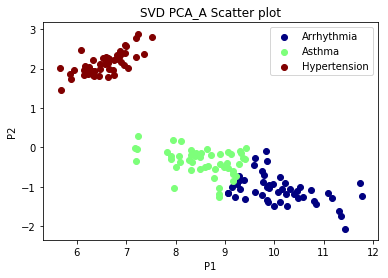

In [16]:
# color_dict = { 'Asthma':'red', 'Arrhythmia':'blue', 'Hypertension':'black' }
x = result[:,0]
y = result[:,1]
classes = np.unique(cols_a)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cols_a[j] == u]
    yi = [y[j] for j  in range(len(x)) if cols_a[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('SVD PCA_A Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')
# plt.scatter( x, y, color=[ color_dict[i] for i in cols_a ] )
# plt.show()
# fig = plt.figure()
plt.savefig('svd_pcaa.png')

## PCA_B

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[[ 3.06865539e+00 -5.67493383e-01]
 [-5.56290181e-01  3.31372862e+00]
 [-6.71835888e-01  3.58872112e+00]
 [ 2.83206367e+00 -5.91512716e-01]
 [ 9.10435968e-01  1.11769321e+00]
 [ 1.41693606e+00  9.13468969e-01]
 [-1.23889456e-01  2.25987268e+00]
 [ 1.44276619e+00  8.47413785e-01]
 [ 1.99842738e+00  8.59649419e-01]
 [ 1.90244192e+00  1.02849228e-01]
 [ 1.20919558e+00  2.09315688e-01]
 [ 1.38149991e+00  3.33697261e-01]
 [ 1.96239563e+00  5.05449258e-01]
 [-2.45314246e-01  3.13775953e+00]
 [ 1.90595653e+00  8.56604809e-01]
 [-1.40077063e-01  3.10544468e+00]
 [ 8.61704431e-01  1.59497850e+00]
 [ 2.72400688e+00 -9.08009513e-01]
 [ 8.10639703e-01  1.46559999e+00]
 [ 1.81686701e+00 -1.69312554e-01]
 [ 2.23827648e-01  2.90387467e+00]
 [ 2.11440165e+00  2.27938694e-02]
 [ 7.22364555e-03  1.60221920e+00]
 [-7.47284418e-01  3.03884722e+00]
 [ 4.37583135e-01  2.17909408e+00]
 [ 2.60508770e+00 -4.91308065e-01]
 [ 3.04012386e+00 -9.71590077e-01]
 [ 2.84884506e+00 -1.01032624e+00]
 [ 1.52999533e-01  3

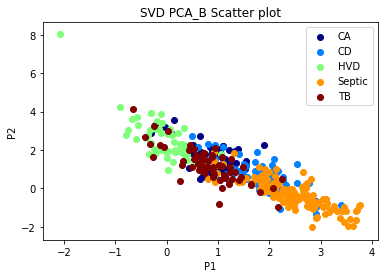

In [17]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(pcab)
result = tsvd.transform(pcab)
print(result)
# print(tsvd.singular_values_)  


# color_dict = { 'Asthma':'red', 'Arrhythmia':'blue', 'Hypertension':'black' }
x = result[:,0]
y = result[:,1]
classes = np.unique(cols_b)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cols_b[j] == u]
    yi = [y[j] for j  in range(len(x)) if cols_b[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('SVD PCA_B Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')
# plt.scatter( x, y, color=[ color_dict[i] for i in cols_a ] )
# plt.show()
# fig = plt.figure()
plt.savefig('svd_pcab.png')

## PCA_C

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[[ 3.99968919e+00 -6.13006829e-01]
 [ 3.53569707e+00 -1.04315948e-01]
 [ 3.36645631e+00 -3.34416122e-01]
 [ 9.02707137e+00 -5.25642104e+00]
 [ 3.97531992e+00  3.23153104e-01]
 [ 4.25295055e+00 -1.41980448e-01]
 [ 4.74681168e+00 -7.94172069e-01]
 [ 3.82237487e+00  2.58891937e-01]
 [ 3.18215002e+00  1.30890540e-01]
 [ 2.80845696e+00 -1.03215443e-01]
 [ 7.08460659e+00  5.98432728e-01]
 [ 4.54006007e+00 -7.89625312e-01]
 [ 3.94788533e+00 -5.72954876e-01]
 [ 8.67721722e+00 -4.24215645e+00]
 [ 5.53078781e+00 -1.36910647e+00]
 [ 3.96699899e+00 -3.16148888e-01]
 [ 7.17135754e+00 -2.75288028e+00]
 [ 3.51854531e+00  1.05500305e-01]
 [ 3.69999714e+00 -7.42442691e-02]
 [ 3.48575054e+00 -1.14076766e-01]
 [ 3.87770993e+00 -6.77036391e-01]
 [ 3.13928395e+00  2.39499396e-01]
 [ 7.63373853e+00  9.88227876e-02]
 [ 7.24767959e+00  1.62439533e+00]
 [ 3.73594313e+00 -7.93616124e-02]
 [ 3.85554966e+00  2.73530426e-01]
 [ 3.37719129e+00 -1.46473679e-01]
 [ 3.91923139e+00  4.96096782e-01]
 [ 6.96677921e+00  2

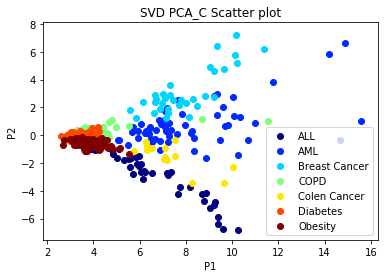

In [18]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(pcac)
result = tsvd.transform(pcac)
print(result)
# print(tsvd.singular_values_)  


# color_dict = { 'Asthma':'red', 'Arrhythmia':'blue', 'Hypertension':'black' }
x = result[:,0]
y = result[:,1]
classes = np.unique(cols_c)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cols_c[j] == u]
    yi = [y[j] for j  in range(len(x)) if cols_c[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('SVD PCA_C Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')
# plt.scatter( x, y, color=[ color_dict[i] for i in cols_a ] )
# plt.show()
# fig = plt.figure()
plt.savefig('svd_pcac.png')

## T-SNE

## PCA_A

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[[-13.386288    5.4726157]
 [-15.790165    5.247544 ]
 [ 27.830383   -3.1155117]
 [-19.64035     3.5887134]
 [ 24.913786   -4.749165 ]
 [-16.792944    3.8631203]
 [ 27.833668   -3.8955672]
 [-19.228985    3.5857313]
 [ -9.786134    1.5289913]
 [-12.211092    5.648903 ]
 [-12.911814    5.329426 ]
 [-11.885565    2.7819903]
 [ -7.664492    3.655282 ]
 [ 28.353888   -3.7802668]
 [-18.24015     4.305809 ]
 [ 28.390253   -2.7301266]
 [ -8.477525    3.9697044]
 [ -9.940286    3.7037933]
 [-11.714345    5.046828 ]
 [ 27.51133    -3.743501 ]
 [-15.979561    4.838046 ]
 [ 25.862915   -3.1137342]
 [ 27.025536   -2.3963075]
 [ -9.710379    1.5974842]
 [-12.550354    2.362926 ]
 [ -8.802204    3.3749883]
 [ -8.187466    4.6291327]
 [-20.506445    4.024072 ]
 [ 24.533804   -4.3130765]
 [ 25.263971   -3.406471 ]
 [ -8.643456    4.3915186]
 [-17.427685    5.049868 ]
 [ 28.647255   -4.1727924]
 [ 25.987232   -5.5522695]
 [-12.069555    4.970308 ]
 [ 25.178474   -3.937129 ]
 [ 25.221088   -3.3784802]
 

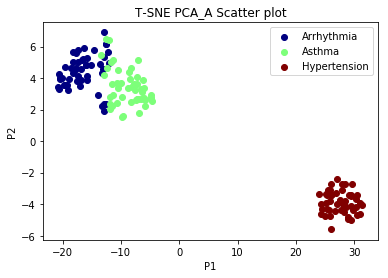

In [22]:
from sklearn.manifold import TSNE
result = TSNE(n_components=2,random_state=0).fit_transform(pcaa)
print(result)

# color_dict = { 'Asthma':'red', 'Arrhythmia':'blue', 'Hypertension':'black' }
x = result[:,0]
y = result[:,1]
classes = np.unique(cols_a)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cols_a[j] == u]
    yi = [y[j] for j  in range(len(x)) if cols_a[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('T-SNE PCA_A Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')
# plt.scatter( x, y, color=[ color_dict[i] for i in cols_a ] )
# plt.show()
# fig = plt.figure()
plt.savefig('tsne_pcaa.png')

## PCA_B 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[[-15.051851   -13.987789  ]
 [ 12.573186    15.700167  ]
 [  8.215876    19.047089  ]
 [-11.307049   -13.96032   ]
 [ 13.20042     -2.5689373 ]
 [ -2.1448874    5.81758   ]
 [ 13.639093    10.853041  ]
 [ -2.6335144    3.3149803 ]
 [-16.139565    -3.2919292 ]
 [ -5.904085    -8.1979    ]
 [  6.7554646   -2.7105222 ]
 [  9.080926    -1.7682472 ]
 [ 10.272636    -6.232133  ]
 [ 11.407775    16.316809  ]
 [ -6.970871    -0.66609645]
 [  8.883281    16.902317  ]
 [  2.2741923   12.828258  ]
 [-10.099658   -14.655835  ]
 [  2.700584    10.229291  ]
 [ -8.997008    -9.774368  ]
 [ 11.749003    14.383214  ]
 [ -4.324591    -7.5926695 ]
 [ 11.319544     7.298057  ]
 [ 13.967433    12.571832  ]
 [  1.8056226   14.255909  ]
 [-10.963897   -13.237588  ]
 [-15.910275   -13.588936  ]
 [ -7.9946165  -15.296976  ]
 [ 11.349422    19.418068  ]
 [ -3.9577003    8.941305  ]
 [ -7.7934217    1.8703518 ]
 [ 11.156422     8.388606  ]
 [ 13.7967615   -3.3773084 ]
 [-12.250577   -10.574572  ]
 [  7.754323  

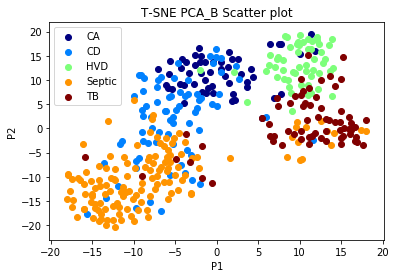

In [23]:
result = TSNE(n_components=2,random_state=0).fit_transform(pcab)
print(result)

# color_dict = { 'Asthma':'red', 'Arrhythmia':'blue', 'Hypertension':'black' }
x = result[:,0]
y = result[:,1]
classes = np.unique(cols_b)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cols_b[j] == u]
    yi = [y[j] for j  in range(len(x)) if cols_b[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('T-SNE PCA_B Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')
# plt.scatter( x, y, color=[ color_dict[i] for i in cols_a ] )
# plt.show()
# fig = plt.figure()
plt.savefig('tsne_pcab.png')

## PCA_C

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[[-3.30946040e+00 -2.97070217e+00]
 [ 8.38176155e+00  1.45195198e+01]
 [ 1.61918545e+01 -1.30998695e+00]
 [-1.42101774e+01 -2.15396652e+01]
 [ 4.72435808e+00  2.00765419e+01]
 [ 1.35437667e+00  1.39851532e+01]
 [-4.05493546e+00 -7.67954445e+00]
 [ 6.31486607e+00  1.90227795e+01]
 [ 1.74922943e+01  1.07641621e+01]
 [ 2.14075413e+01  6.01655293e+00]
 [-2.17258358e+01 -1.28520880e+01]
 [-4.96223116e+00 -6.54933739e+00]
 [-4.03647184e+00 -1.05098259e+00]
 [-1.44156580e+01 -2.01512489e+01]
 [-9.54692841e+00 -9.13204002e+00]
 [-2.97328210e+00  5.58397472e-01]
 [-1.28113022e+01 -1.77896709e+01]
 [ 1.19232969e+01  1.62961102e+01]
 [ 8.65425587e+00  2.07562828e+01]
 [ 1.17239437e+01  8.44267845e+00]
 [ 1.71576333e+00 -2.96201015e+00]
 [ 2.04339962e+01  1.38571501e+01]
 [-2.04636593e+01 -1.42609367e+01]
 [-2.38458023e+01 -1.14546967e+01]
 [ 1.11525402e+01  1.54824924e+01]
 [ 3.35379243e+00  1.65128822e+01]
 [ 1.50079184e+01  8.85635281e+00]
 [ 2.89484262e+00  1.78050652e+01]
 [-2.61867943e+01 -7

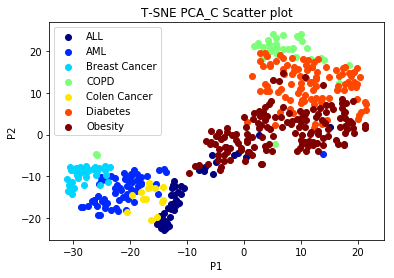

In [24]:
result = TSNE(n_components=2,random_state=0).fit_transform(pcac)
print(result)

# color_dict = { 'Asthma':'red', 'Arrhythmia':'blue', 'Hypertension':'black' }
x = result[:,0]
y = result[:,1]
classes = np.unique(cols_c)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cols_c[j] == u]
    yi = [y[j] for j  in range(len(x)) if cols_c[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('T-SNE PCA_C Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')
# plt.scatter( x, y, color=[ color_dict[i] for i in cols_a ] )
# plt.show()
# fig = plt.figure()
plt.savefig('tsne_pcac.png')